In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [5]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df=df.drop(columns=['Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','JobInvolvement','JobLevel','Over18', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsWithCurrManager'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   Gender                   1470 non-null   object
 8   HourlyRate               1470 non-null   int64 
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   int64 
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  MonthlyRate              1470 non-null   int64 
 14  NumCompaniesWorked       1470 non-null  

In [10]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
EducationField             0
Gender                     0
HourlyRate                 0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
MonthlyRate                0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
outlier_count=[]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers=((df[col] < lower) | (df[col] > upper)).sum()
    outlier_count.append([col,outliers])
    
df_new=pd.DataFrame(outlier_count,columns=["columns","Outlier_count"])
print(df_new)

                    columns  Outlier_count
0                       Age              0
1                 DailyRate              0
2          DistanceFromHome              0
3                HourlyRate              0
4           JobSatisfaction              0
5             MonthlyIncome            114
6               MonthlyRate              0
7        NumCompaniesWorked             52
8         PercentSalaryHike              0
9         PerformanceRating            226
10        TotalWorkingYears             63
11           YearsAtCompany            104
12       YearsInCurrentRole             21
13  YearsSinceLastPromotion            107


In [13]:
df_clean=df.copy()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean=df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
print(df.shape)
print(df_clean.shape)

(1470, 22)
(1002, 22)


In [14]:
df_clean['Attrition'].value_counts()

Attrition
No     831
Yes    171
Name: count, dtype: int64

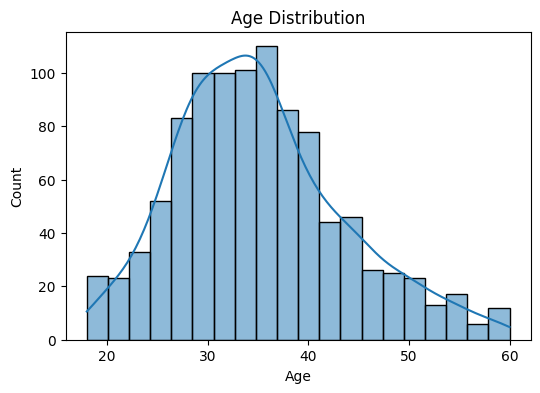

In [15]:
# Age Distribution

plt.figure(figsize=(6,4))
sns.histplot(df_clean['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


Most employees are between 30–40 years old.

Attrition is relatively higher among young employees (20–30).

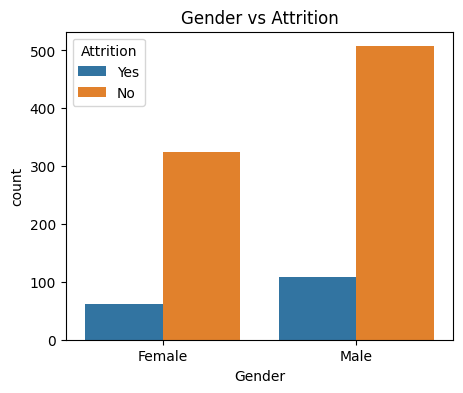

In [16]:
# Attrition by gender

plt.figure(figsize=(5,4))
sns.countplot(x='Gender', hue='Attrition', data=df_clean)
plt.title("Gender vs Attrition")
plt.show()

Males show slightly higher attrition but difference is not big.

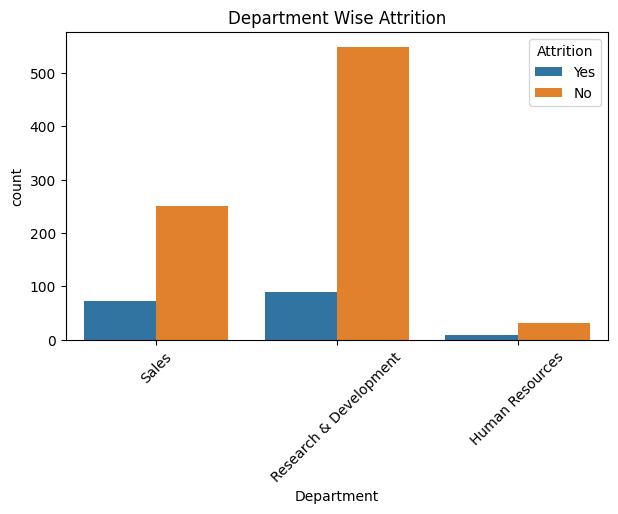

In [17]:
#Attrition by department

plt.figure(figsize=(7,4))
sns.countplot(x='Department', hue='Attrition', data=df_clean)
plt.title("Department Wise Attrition")
plt.xticks(rotation=45)
plt.show()


Highest attrition in Sales and R&D.

HR department has fewer employees overall.

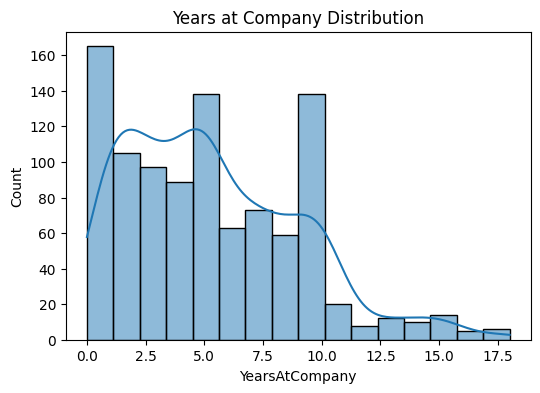

In [18]:
#Years at company

plt.figure(figsize=(6,4))
sns.histplot(df_clean['YearsAtCompany'], kde=True)
plt.title("Years at Company Distribution")
plt.show()

Many employees are new (0–5 years).

Most attrition happens in early years.

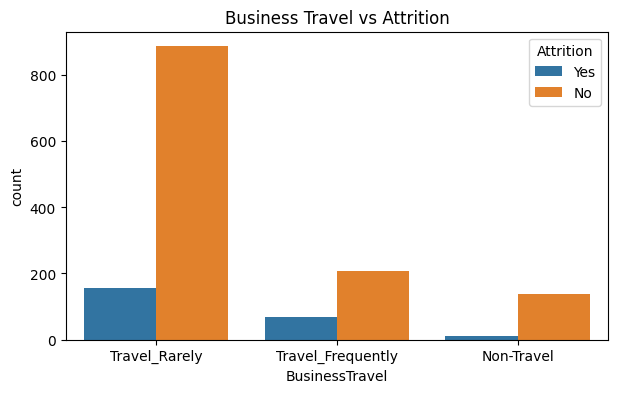

In [19]:
# Business travel frequency

plt.figure(figsize=(7,4))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title("Business Travel vs Attrition")
plt.show()


Frequent Travelers have higher attrition.

### Encoding, Scaling and Splitting data

In [20]:
le=LabelEncoder()
obj_columns=['BusinessTravel','Department','Gender','EducationField','JobRole','MaritalStatus','OverTime','Attrition']
for col in obj_columns:
    df_clean[col]=le.fit_transform(df_clean[col])

In [21]:
x=df_clean.drop('Attrition',axis=1)
y=df_clean['Attrition']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [24]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train_sm)
x_test_sc=sc.transform(x_test)

##### Logistic Regression

In [25]:
# Logistic Regression

lr=LogisticRegression(max_iter=500)
lr.fit(x_train_sc,y_train_sm)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [26]:
y_pred=lr.predict(x_test_sc)

In [27]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.681592039800995
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       172
           1       0.25      0.62      0.36        29

    accuracy                           0.68       201
   macro avg       0.58      0.66      0.57       201
weighted avg       0.82      0.68      0.73       201

[[119  53]
 [ 11  18]]
0.6562750601443464


##### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
param_grid={
    'n_estimators':[50,70,100,200],
    'max_depth':[10,20,30],
    'min_samples_split':[2,3,4,5]
}

In [30]:
rfc=RandomForestClassifier(random_state=42)

In [31]:
grid=GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc_ovo_weighted'
)

In [32]:
grid.fit(x_train_sc,y_train_sm)
print("Best Param:",grid.best_params_)
print("Best Score:",grid.best_score_)

Best Param: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9499224987557742


In [33]:
rfc=RandomForestClassifier(max_depth=30,min_samples_split=2,n_estimators=200)
rfc.fit(x_train_sc,y_train_sm)

,n_estimators,200
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
y_pred=rfc.predict(x_test_sc)

In [35]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.8109452736318408
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       172
           1       0.33      0.31      0.32        29

    accuracy                           0.81       201
   macro avg       0.61      0.60      0.61       201
weighted avg       0.81      0.81      0.81       201

[[154  18]
 [ 20   9]]
0.6028468323977547


##### XGBoost

In [36]:
from xgboost import XGBClassifier

In [37]:
param_grid={
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.05,0.1,0.5],
    'max_depth':[2,3,5],
    'subsample':[0.1,0.5,0.8]
}

In [38]:
xgb=XGBClassifier()

In [39]:
grid=GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc_ovo_weighted'
)

In [40]:
grid.fit(x_train_sc,y_train_sm)
print("Best Param:",grid.best_params_)
print("Best score:",grid.best_score_)

Best Param: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best score: 0.9492072880084678


In [41]:
xgb=XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=300,subsample=0.8)
xgb.fit(x_train_sc,y_train_sm)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [42]:
y_pred=xgb.predict(x_test_sc)

In [43]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.835820895522388
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       172
           1       0.42      0.34      0.38        29

    accuracy                           0.84       201
   macro avg       0.65      0.63      0.64       201
weighted avg       0.82      0.84      0.83       201

[[158  14]
 [ 19  10]]
0.6317161186848436


### Logistic Regression is the best model because:
### * It has the highest ROC-AUC score
### * It has the highest recall for class 1 (62%)
### * It predicts double the number of minority class compared to XGBoost and Random Forest 

In [50]:
df_clean.corr()['Attrition'].sort_values(ascending=False)

Attrition                  1.000000
OverTime                   0.242857
MaritalStatus              0.151042
DistanceFromHome           0.085036
Department                 0.074940
JobRole                    0.060756
NumCompaniesWorked         0.037334
MonthlyRate                0.027319
EducationField             0.027268
Gender                     0.021119
BusinessTravel             0.010268
HourlyRate                 0.001642
YearsSinceLastPromotion   -0.014871
PercentSalaryHike         -0.051026
DailyRate                 -0.058672
JobSatisfaction           -0.079566
MonthlyIncome             -0.144636
Age                       -0.182480
YearsInCurrentRole        -0.182495
TotalWorkingYears         -0.192706
YearsAtCompany            -0.199620
PerformanceRating               NaN
Name: Attrition, dtype: float64